In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/purzelrakete/src/github.com/feldberlin/wavenet


In [2]:
import os

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, sample, audio, datasets, utils, viz

# Train on a single Track

Run this on a GPU. Try to overfit a single track.

In [3]:
dry = False
if dry:
    os.environ['WANDB_MODE'] = 'dryrun'

In [4]:
p = model.HParams()
ds, ds_test = datasets.tracks('fixtures/aria.wav', 0.2, p)

In [5]:
m = model.Wavenet(p)
tp = train.HParams(max_epochs=50, batch_size=8, num_workers=8, learning_rate=0.0026)
t = train.Trainer(m, ds, ds_test, tp, None)

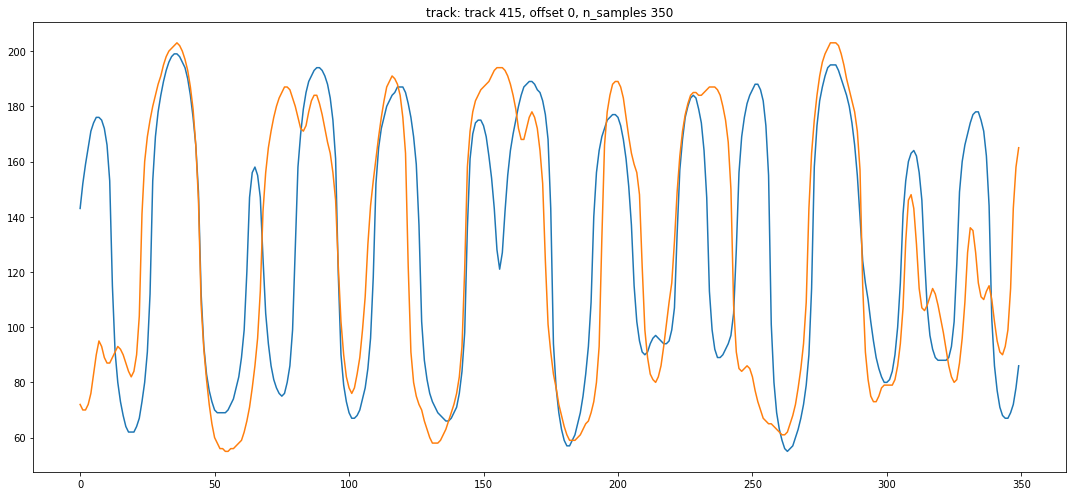

In [6]:
track_i = viz.plot_random_track(ds)
track, *_ = ds[track_i]
ipd.Audio(audio.mu_expand(track.numpy(), p), rate=p.sampling_rate)

In [7]:
t.train()

wandb: Currently logged in as: purzelrakete (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.31 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: WARNING Symlinked 2 files into the W&B run directory, call wandb.save again to sync new files.
  0%|          | 0/59 [00:00<?, ?it/s]/home/purzelrakete/src/github.com/feldberlin/wavenet/.venv/lib/python3.7/site-packages/torch/nn/modules/module.py:785: UserWarning: Using a non-full backward hook when outputs are generated by different autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_output. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when outputs are generated by different autograd Nodes "
/home/purzelrakete/src/github.com/feldberlin/wavenet/.venv/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:65: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
50:58 loss 0.95263 lr 1.190443e-08: 100%|██████

In [8]:
tracks, logits, g = sample.fast(m, ds.transforms, utils.decode_random, n_samples=32000, batch_size=10)

In [34]:
for track in tracks:
    track = ds.transforms.normalise(track.numpy())
    track = audio.mu_expand(track, p)
    display(ipd.Audio(track, rate=p.sampling_rate))